Pobierz bazę danych dotyczącą śmiertelnych interwencji policji w USA, a następnie wczytaj ją do obiektu DataFrame

In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv('crime.csv')
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


Przekształć tabelę w taki sposób, aby wskazywała zestawienie jednocześnie liczby ofiar interwencji według rasy (‘race’) oraz tego, czy wykazywały one oznaki choroby psychicznej (‘signs_of_mental_illness’).

In [3]:
race_mental = df.pivot_table(values='id',index='race',columns=['signs_of_mental_illness'],aggfunc='count')
race_mental

signs_of_mental_illness,False,True
race,,
A,69,24
B,1114,184
H,745,157
N,64,14
O,37,11
W,1763,713


Za pomocą Map, Applymap lub Apply dodaj do tego zestawienia kolumnę wskazującą jaki odsetek ofiar interwencji wykazywało oznaki choroby psychicznej dla każdej z ras. Odpowiedz, która z nich charakteryzuje się największym odsetkiem znamion choroby psychicznej podczas interwencji.

In [4]:
def percentage(row):
    percentage = row[True]/(row[True]+row[False])
    return percentage
race_mental['Percent'] = race_mental.apply(lambda row: percentage(row),axis=1).round(2)
race_mental

signs_of_mental_illness,False,True,Percent
race,,,
A,69,24,0.26
B,1114,184,0.14
H,745,157,0.17
N,64,14,0.18
O,37,11,0.23
W,1763,713,0.29


In [5]:
race_mental.sort_values(by='Percent',ascending=False)

signs_of_mental_illness,False,True,Percent
race,,,
W,1763,713,0.29
A,69,24,0.26
O,37,11,0.23
N,64,14,0.18
H,745,157,0.17
B,1114,184,0.14


In [6]:
print(f"Najwięlszym odsetkiem znamion choroby psychicznej podczas interwencji wykazuje się rasa W")

Najwięlszym odsetkiem znamion choroby psychicznej podczas interwencji wykazuje się rasa W


Dodaj kolumnę oznaczającą dzień tygodnia, w którym doszło do interwencji. Zlicz interwencje według odpowiedniego dnia tygodnia. Następnie stwórz wykres kolumnowy, tak aby dni tygodnia były uszeregowane od poniedziałku do niedzieli.

In [7]:
df['date'] = pd.to_datetime(df['date'])
df['week_day']=df['date'].dt.day_name()
df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,week_day
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,Friday
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,Friday
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,Saturday
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,Sunday
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5411,5921,William Slyter,2020-06-13,shot,gun,22.0,M,W,Kansas City,MO,False,other,Other,False,Saturday
5412,5922,TK TK,2020-06-13,shot,undetermined,NaN,M,NaN,San Bernardino,CA,False,attack,Not fleeing,False,Saturday
5413,5924,Nicholas Hirsh,2020-06-15,shot,gun,31.0,M,W,Lawrence,KS,False,attack,Car,False,Monday
5414,5926,TK TK,2020-06-16,shot,gun,24.0,M,NaN,Beach Park,IL,False,attack,Not fleeing,False,Tuesday


In [8]:
weekday = df.pivot_table(values='id',index='week_day',aggfunc='count')
weekday

,id
week_day,
Friday,761
Monday,726
Saturday,721
Sunday,753
Thursday,810
Tuesday,816
Wednesday,829


In [9]:
weekday = weekday.reindex(['Monday', 'Tuesday', 'Wednesday','Thursday', 'Friday', 'Saturday','Sunday'])
weekday

,id
week_day,
Monday,726
Tuesday,816
Wednesday,829
Thursday,810
Friday,761
Saturday,721
Sunday,753


<Axes: xlabel='week_day'>

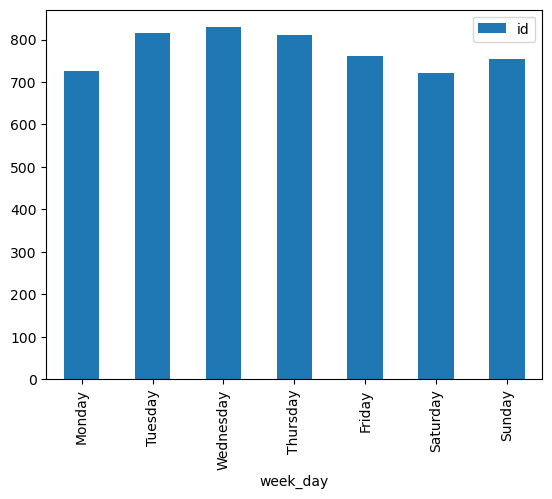

In [10]:
weekday.plot.bar()

Wczytaj do projektu dane dotyczące populacji w poszczególnych stanach USA oraz dane dotyczące skrótów poszczególnych stanów. Połącz te bazy danych w taki sposób, aby móc policzyć do ilu incydentów w bazie dotyczącej śmiertelnych interwencji doszło w przeliczeniu na 1000 mieszkańców każdego ze stanów.

In [13]:
data = pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population', header=0)

In [14]:
population_data = pd.DataFrame(data[0])
population_data.head()

,"Rank in states & territories, 2020","Rank in states & territories, 2010",State,"Census population, April 1, 2020 [1][2]","Census population, April 1, 2010 [1][2]","Percent change, 2010–2020 [note 1]","Absolute change, 2010-2020","Total seats in the U.S. House of Representatives, 2023–2033",Census population per electoral vote [note 2],Census population per House seat,"Percent of the total U.S. population, 2020 [note 3]"
0,1,1,California,38538223,37253956,6.1%,+2284267,52,732189,760350,11.80%
1,2,2,Texas,30145505,25145561,15.9%,+3999944,38,728638,766987,8.70%
2,3,4,Florida,21538187,18801310,14.6%,+2736877,28,717940,769221,6.43%
3,4,3,New York,20201249,19378102,4.2%,+823147,26,721473,776971,6.03%
4,5,6,Pennsylvania,13002700,12702379,2.4%,+300321,17,684353,764865,3.88%


In [15]:
data1 = pd.read_html('https://en.wikipedia.org/wiki/List_of_U.S._state_and_territory_abbreviations', header=0)

In [16]:
abv = pd.DataFrame(data1[0])
abv.head()

,"Codes: ISO ISO 3166 codes (2-letter, 3-letter, and 3-digit codes from ISO 3166-1; 2+2-letter codes from ISO 3166-2) ANSI 2-letter and 2-digit codes from the ANSI standard INCITS 38:2009 (supersedes FIPS 5-2) USPS 2-letter codes used by the United States Postal Service USCG 2-letter codes used by the United States Coast Guard (bold red text shows differences between ANSI and USCG) Abbreviations: GPO Older variable-length official US Government Printing Office abbreviations AP Abbreviations from the AP Stylebook (bold red text shows differences between GPO and AP)","Codes: ISO ISO 3166 codes (2-letter, 3-letter, and 3-digit codes from ISO 3166-1; 2+2-letter codes from ISO 3166-2) ANSI 2-letter and 2-digit codes from the ANSI standard INCITS 38:2009 (supersedes FIPS 5-2) USPS 2-letter codes used by the United States Postal Service USCG 2-letter codes used by the United States Coast Guard (bold red text shows differences between ANSI and USCG) Abbreviations: GPO Older variable-length official US Government Printing Office abbreviations AP Abbreviations from the AP Stylebook (bold red text shows differences between GPO and AP).1","Codes: ISO ISO 3166 codes (2-letter, 3-letter, and 3-digit codes from ISO 3166-1; 2+2-letter codes from ISO 3166-2) ANSI 2-letter and 2-digit codes from the ANSI standard INCITS 38:2009 (supersedes FIPS 5-2) USPS 2-letter codes used by the United States Postal Service USCG 2-letter codes used by the United States Coast Guard (bold red text shows differences between ANSI and USCG) Abbreviations: GPO Older variable-length official US Government Printing Office abbreviations AP Abbreviations from the AP Stylebook (bold red text shows differences between GPO and AP).2","Codes: ISO ISO 3166 codes (2-letter, 3-letter, and 3-digit codes from ISO 3166-1; 2+2-letter codes from ISO 3166-2) ANSI 2-letter and 2-digit codes from the ANSI standard INCITS 38:2009 (supersedes FIPS 5-2) USPS 2-letter codes used by the United States Postal Service USCG 2-letter codes used by the United States Coast Guard (bold red text shows differences between ANSI and USCG) Abbreviations: GPO Older variable-length official US Government Printing Office abbreviations AP Abbreviations from the AP Stylebook (bold red text shows differences between GPO and AP).3","Codes: ISO ISO 3166 codes (2-letter, 3-letter, and 3-digit codes from ISO 3166-1; 2+2-letter codes from ISO 3166-2) ANSI 2-letter and 2-digit codes from the ANSI standard INCITS 38:2009 (supersedes FIPS 5-2) USPS 2-letter codes used by the United States Postal Service USCG 2-letter codes used by the United States Coast Guard (bold red text shows differences between ANSI and USCG) Abbreviations: GPO Older variable-length official US Government Printing Office abbreviations AP Abbreviations from the AP Stylebook (bold red text shows differences between GPO and AP).4","Codes: ISO ISO 3166 codes (2-letter, 3-letter, and 3-digit codes from ISO 3166-1; 2+2-letter codes from ISO 3166-2) ANSI 2-letter and 2-digit codes from the ANSI standard INCITS 38:2009 (supersedes FIPS 5-2) USPS 2-letter codes used by the United States Postal Service USCG 2-letter codes used by the United States Coast Guard (bold red text shows differences between ANSI and USCG) Abbreviations: GPO Older variable-length official US Government Printing Office abbreviations AP Abbreviations from the AP Stylebook (bold red text shows differences between GPO and AP).5","Codes: ISO ISO 3166 codes (2-letter, 3-letter, and 3-digit codes from ISO 3166-1; 2+2-letter codes from ISO 3166-2) ANSI 2-letter and 2-digit codes from the ANSI standard INCITS 38:2009 (supersedes FIPS 5-2) USPS 2-letter codes used by the United States Postal Service USCG 2-letter codes used by the United States Coast Guard (bold red text shows differences between ANSI and USCG) Abbreviations: GPO Older variable-length official US Government Printing Office abbreviations AP Abbreviations from the AP Stylebook (bold red text shows differences between GPO a

In [17]:
columns = dict(map(reversed, enumerate(abv.columns)))
abv = abv.rename(columns=columns)
abv.columns

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64')

In [18]:
abv = abv.rename(columns={0:'col0',1:'col1',2:'col2',3:'col3',4:'col4',5:'col5',6:'col6',7:'col17', 8:'col8',9:'col9'})
abv

,col0,col1,col2,col3,col4,col5,col6,col17,col8,col9
0,Codes:,Codes:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ISO,"ISO 3166 codes (2-letter, 3-letter, and 3-digi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ANSI,2-letter and 2-digit codes from the ANSI stand...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USPS,2-letter codes used by the United States Posta...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USCG,2-letter codes used by the United States Coast...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
83,Nebraska,Obsolete postal code[g],NaN,NaN,NaN,NB,NaN,NaN,NaN,NaN
84,Northern Mariana Islands,Obsolete postal code[h],NaN,NaN,NaN,CM,NaN,NaN,NaN,NaN
85,Panama Canal Zone,Obsolete postal code,PZ PCZ 594,NaN,NaN,CZ,NaN,NaN,NaN,NaN
86,Philippine Islands,Obsolete postal code,PH PHL 608[10],NaN,NaN,PI,NaN,NaN,NaN,NaN


In [19]:
state_dict = dict(zip(abv['col0'],abv['col5']))
population_data['state'] = population_data['State'].map(state_dict)
population_data.head()

,"Rank in states & territories, 2020","Rank in states & territories, 2010",State,"Census population, April 1, 2020 [1][2]","Census population, April 1, 2010 [1][2]","Percent change, 2010–2020 [note 1]","Absolute change, 2010-2020","Total seats in the U.S. House of Representatives, 2023–2033",Census population per electoral vote [note 2],Census population per House seat,"Percent of the total U.S. population, 2020 [note 3]",state
0,1,1,California,38538223,37253956,6.1%,+2284267,52,732189,760350,11.80%,CA
1,2,2,Texas,30145505,25145561,15.9%,+3999944,38,728638,766987,8.70%,TX
2,3,4,Florida,21538187,18801310,14.6%,+2736877,28,717940,769221,6.43%,FL
3,4,3,New York,20201249,19378102,4.2%,+823147,26,721473,776971,6.03%,NY
4,5,6,Pennsylvania,13002700,12702379,2.4%,+300321,17,684353,764865,3.88%,PA


In [20]:
import math
population_data['population_in_1000'] = population_data['Census population, April 1, 2020 [1][2]'].apply(lambda x: math.ceil(x/1000))
population_data.head()

,"Rank in states & territories, 2020","Rank in states & territories, 2010",State,"Census population, April 1, 2020 [1][2]","Census population, April 1, 2010 [1][2]","Percent change, 2010–2020 [note 1]","Absolute change, 2010-2020","Total seats in the U.S. House of Representatives, 2023–2033",Census population per electoral vote [note 2],Census population per House seat,"Percent of the total U.S. population, 2020 [note 3]",state,population_in_1000
0,1,1,California,38538223,37253956,6.1%,+2284267,52,732189,760350,11.80%,CA,38539
1,2,2,Texas,30145505,25145561,15.9%,+3999944,38,728638,766987,8.70%,TX,30146
2,3,4,Florida,21538187,18801310,14.6%,+2736877,28,717940,769221,6.43%,FL,21539
3,4,3,New York,20201249,19378102,4.2%,+823147,26,721473,776971,6.03%,NY,20202
4,5,6,Pennsylvania,13002700,12702379,2.4%,+300321,17,684353,764865,3.88%,PA,13003


In [22]:
abv_population = population_data.pivot_table(values='population_in_1000',index=['state'],aggfunc='sum')
abv_population.head()

,population_in_1000
state,
AK,734
AL,5025
AR,3012
AS,50
AZ,7152


In [147]:
incidents_count = df.pivot_table(values=['id'],index=['state'],aggfunc='count')
incidents_count.head()

,id
state,
AK,39
AL,104
AR,83
AZ,254
CA,799


In [167]:
population_incidents = pd.merge(abv_population,incidents_count,how='inner',on='state')
state_dict_reversed = dict(zip(state_dict.values(), state_dict.keys()))
population_incidents['state_name'] = population_incidents.index.map(state_dict_reversed)
population_incidents.head()

,population_in_1000,id,state_name
state,,,
AK,734,39,Alaska
AL,5025,104,Alabama
AR,3012,83,Arkansas
AZ,7152,254,Arizona
CA,38539,799,California


In [173]:
def rate(row):
    rate = row['id']/row['population_in_1000']
    return rate
population_incidents['rate'] = population_incidents.apply(lambda row: rate(row),axis=1)
population_incidents.round(2)

,population_in_1000,id,state_name,rate
state,,,,
AK,734,39,Alaska,0.05
AL,5025,104,Alabama,0.02
AR,3012,83,Arkansas,0.03
AZ,7152,254,Arizona,0.04
CA,38539,799,California,0.02
CO,5774,195,Colorado,0.03
CT,3606,21,Connecticut,0.01
DC,690,13,District of Columbia,0.02
DE,990,13,Delaware,0.01
